# Аналіз модуля №1 (Тест). КН-1 2024

---

## 1. Пакети

In [5]:
# install.packages("tidyverse")

In [10]:
library(tidyverse)
library(readxl)

## 2. Читання документа

In [3]:
path <- "data/test.xlsx"

In [11]:
group <- "kn1" #ek2

In [12]:
test_data <- read_excel(path, sheet = group)
keys_data <- read_excel(path, sheet = "keys")

In [13]:
colnames(test_data) <- c("No", "Std", "Group", "V", paste0("Q", 1:20), "Check")
test_data

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,C,C,C,C,C,B,...,C,C,B,C,B,B,A,A,B,NA
2,Андрощук Роман Вікторович,КН-1(5)-1,1,B,C,C,C,B,A,...,C,C,C,B,B,A,C,C,B,NA
3,Басок Максим Олександрович,КН-1(5)-3,4,C,A,D,D,B,C,...,C,A,C,B,B,D,A,B,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,D,B,A,D,D,D,...,A,B,D,A,B,C,A,C,C,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,A,B,B,C,...,C,D,B,A,D,A,D,D,C,NA
7,Власенко Андрій Максимович,КН-1(5)-1,6,A,B,D,C,B,A,...,B,B,C,A,B,D,A,D,C,NA
8,Войтюк Назарій Васильович,КН-1(5)-1,9,C,C,B,C,C,A,...,C,B,C,D,D,B,B,A,B,NA
9,Воробей Юрій Вікторович,КН-1(5)-1,7,-,C,B,A,C,-,...,C,C,B,C,B,-,-,-,A,NA


In [7]:
test_data <- test_data |>
    #mutate(Std = "****** ****") |>
    mutate_at(colnames(test_data)[5:24], factor, levels = c("A", "B", "C", "D", "X")) |>
    mutate(across(contains("Q"), ~replace_na(.x, "X")))
head(test_data)

ERROR: [1m[33mError[39m in `tbl_at_vars()`:[22m
[33m![39m Selections can't have missing values.


In [42]:
test_data_v1 <- test_data |> filter(V %% 2 == 1)
nrow(test_data_v1)
test_data_v2 <- test_data |> filter(V %% 2 == 0)
nrow(test_data_v2)

[1] 29

[1] 33

In [43]:
colnames(test_data_v2) <- c("No", "Std", "Group", "V", paste0("Q", keys_data$V2N), "Check")
test_data_v2 <- test_data_v2 |> select(No, Std, V, Group, paste0("Q", 1:20), Check)
head(test_data_v2)

No,Std,V,Group,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
3,Басок Максим Олександрович,4,КН-1(5)-3,A,C,A,B,B,C,...,A,D,D,C,D,C,A,A,C,NA
4,Башмаков Богдан Олегович,8,КН-1(5)-1,D,B,D,A,B,B,...,C,A,D,B,A,C,C,D,D,5.25
5,Бенедик Олександр Сергійович,2,КН-1(5)-5,B,D,A,A,B,D,...,B,A,D,B,C,D,C,C,A,NA
6,Боженко Анастасія Ігорівна,6,КН-1(5)-1,D,B,D,A,D,D,...,B,A,D,B,A,C,D,A,C,NA
7,Власенко Андрій Максимович,6,КН-1(5)-1,B,C,A,A,B,A,...,B,D,C,B,C,A,A,D,B,NA
12,Грицаюк Богдан Вікторович,8,КН-1(5)-1,A,C,C,A,C,C,...,B,D,B,B,A,B,B,C,B,NA


In [44]:
test_data <- test_data_v1 |>
    bind_rows(test_data_v2)

In [45]:
answers_matrix <-  test_data |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,C,C,C,C,B,B,C,A,A,C,C,C,B,C,B,B,A,A,B
B,C,C,C,B,A,B,A,A,A,B,C,C,C,B,B,A,C,C,B
C,C,B,C,C,A,D,B,A,C,A,C,B,C,D,D,B,B,A,B
X,C,B,A,C,X,B,C,A,A,D,C,C,B,C,B,X,X,X,A
C,C,D,D,C,C,B,C,A,A,D,C,C,A,B,X,X,X,X,X
C,B,A,B,D,A,A,C,D,A,C,B,C,A,D,D,A,D,A,A
C,B,C,A,C,C,A,C,D,A,D,C,D,C,B,B,B,D,A,D
A,D,D,C,C,B,C,D,A,B,C,C,B,A,B,A,C,D,A,B
C,B,D,A,C,B,B,D,B,C,A,D,C,A,C,A,C,D,A,B
C,B,B,C,C,B,D,A,A,B,C,C,C,B,B,A,C,D,A,B


In [46]:
correct_answers <- keys_data$V1

In [47]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- answers_matrix[, i] == correct_answers[i]
}

In [54]:
grade <- 15/20

final_grades <- test_data |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data |> select(Check))
colnames(final_grades) <- colnames(test_data)

final_grades <- final_grades |>
   mutate_if(is.logical, function(x) {ifelse(x, grade, 0)}) 
final_grades <- final_grades |>
    rowwise() |>
   mutate(Total = sum(across(Q1:Q20), na.rm = T)) 

final_grades

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check,Total
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,0.75,0.75,0.75,0.00,0.00,0.00,...,0.75,0.75,0.75,0.75,0.00,0.75,0.75,0.00,NA,9.00
2,Андрощук Роман Вікторович,КН-1(5)-1,1,0.00,0.75,0.75,0.00,0.00,0.00,...,0.75,0.00,0.00,0.75,0.00,0.00,0.00,0.00,NA,4.50
8,Войтюк Назарій Васильович,КН-1(5)-1,9,0.75,0.75,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,NA,3.00
9,Воробей Юрій Вікторович,КН-1(5)-1,7,0.00,0.75,0.00,0.00,0.00,0.00,...,0.75,0.75,0.75,0.75,0.00,0.00,0.00,0.75,NA,7.50
10,Герасимчук Наталія Миколаївна,КН-1(5)-1,7,0.75,0.75,0.00,0.75,0.00,0.75,...,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NA,6.75
11,Гомон Христина Вікторівна,КН-1(5)-1,5,0.75,0.00,0.00,0.00,0.75,0.00,...,0.75,0.00,0.00,0.00,0.00,0.00,0.75,0.75,NA,6.00
13,Гулієв Артур Борисович,КН-1(5)-1,3,0.75,0.00,0.75,0.00,0.00,0.75,...,0.00,0.00,0.00,0.75,0.00,0.00,0.75,0.00,NA,6.75
14,Гулюк Станіслав Юрійович,КН-1(5)-1,9,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,NA,1.50
16,Дячук Дарина Олегівна,КН-1(5)-2,1,0.75,0.00,0.00,0.00,0.00,0.00,...,0.75,0.00,0.75,0.00,0.00,0.00,0.75,0.00,NA,3.75


Warning message in max():
"no non-missing arguments to max; returning -Inf"


[1] -Inf

In [56]:
final_grades |> 
select(2,26) |> 
arrange(desc(Total)) |> 
mutate(TotalFinal = ceiling(Total/max(final_grades$Total)*15))

Std,Total,TotalFinal
<chr>,<dbl>,<dbl>
Лізак Даниїл Станіславович,12.00,15
Анпілогов Антон Юрійович,9.00,12
Клименко Анастасія Вячеславівна,9.00,12
Нечипорук Марія Ярославівна,8.25,11
Воробей Юрій Вікторович,7.50,10
Мукомела Богдан Олексійович,7.50,10
Герасимчук Наталія Миколаївна,6.75,9
Гулієв Артур Борисович,6.75,9
Маринич Данило Віталійович,6.75,9


In [109]:
mean(final_grades$Total)

[1] 4.270161

In [110]:
table(test1_data$V)

ERROR: Error in table(test1_data$V): object 'test1_data' not found


In [111]:
x <- test_data |> select(Q1:Q20) |> unlist() |> table() |> prop.table() |> as.data.frame() 
x

Var1,Freq
<fct>,<dbl>
A,0.208870968
B,0.258870968
C,0.299193548
D,0.223387097
X,0.009677419


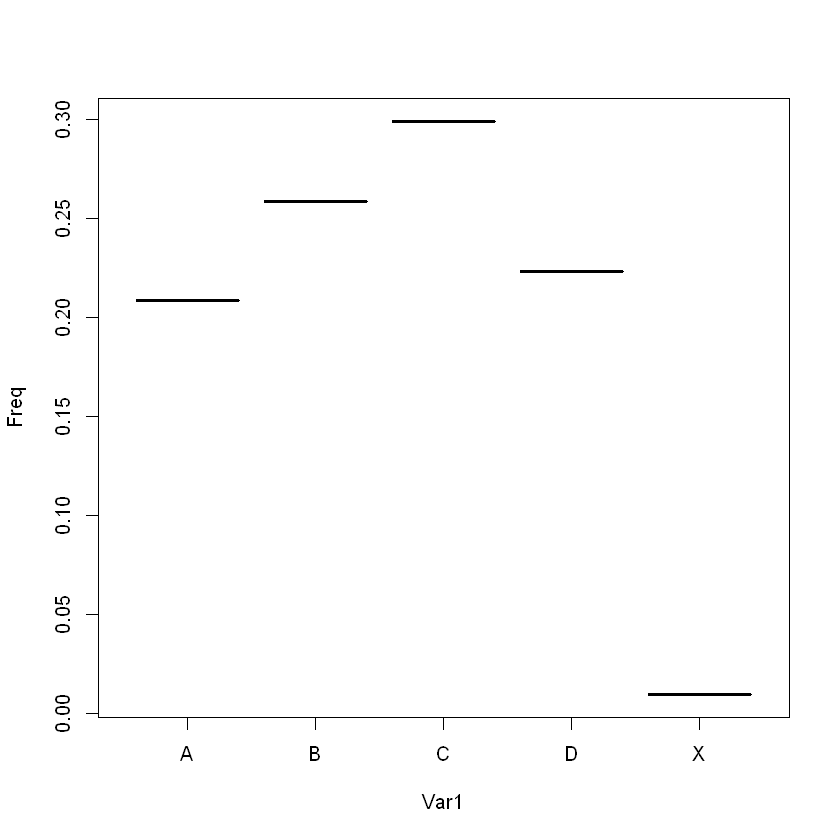

In [112]:
plot(x)

In [113]:
summary(test1_data)

ERROR: Error in summary(test1_data): object 'test1_data' not found


In [114]:
test_data

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Фесюк Сергій,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
5,РАДЧУК НАТАЛІЯ,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
7,АНПІЛОГОВ АНТОН,1,C,C,C,C,C,B,B,...,C,C,C,B,C,B,B,A,A,B
8,ЗЛОЖЕНКО АНДРІЙ,1,C,B,B,C,C,B,D,...,C,C,C,B,B,A,C,D,A,B
9,ГЕРАСИМЧУК НАТАЛІЯ,1,C,C,D,D,C,C,B,...,D,C,C,A,B,X,X,X,X,X
10,АНУКОЩУК РОМАН,1,B,C,C,C,B,A,B,...,B,C,C,C,B,B,A,C,C,B
11,ЮРКІВ ДЕНИС,1,D,C,B,C,D,C,B,...,B,C,B,D,A,B,B,D,A,A
13,ТАБАЧУК ОЛЕКСАНДР,1,B,B,A,C,C,D,C,...,D,C,B,C,B,A,C,D,C,A
14,ДЯЧУК ДАРИНА,1,C,B,D,A,C,B,B,...,A,D,C,A,C,A,C,D,A,B
